In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Dataset_builder:
    def __init__(self, directory_path, batch_size, target_size):
        self.directory_path = directory_path
        self.batch_size = batch_size
        self.target_size = target_size

        dataset = tf.keras.utils.image_dataset_from_directory(
            directory=directory_path,
            labels=None,
            label_mode=None,
            class_names=None,
            color_mode='rgb',
            batch_size=None,
            image_size=self.target_size,
            shuffle=True,
            seed=None,
            validation_split=None,
            subset=None,
            interpolation='bilinear',
            follow_links=False,
            crop_to_aspect_ratio=False)

        self.image_dataset = dataset.map(self.map_dataset).batch(batch_size=batch_size, drop_remainder = True).prefetch(buffer_size=1)
        pass


    def map_dataset(self, datapoint):
        datapoint = tf.cast(datapoint, tf.uint8)
        return datapoint

    def get_dataset(self):
        return self.image_dataset

In [4]:
dataset_directory_path = "C:/Users/allan/Downloads/GANFacesDateset"

target_size = (128,128)

In [5]:
dataset_builder = Dataset_builder(directory_path=dataset_directory_path, batch_size=4, target_size=target_size)
dataset = dataset_builder.get_dataset()

Found 10000 files belonging to 1 classes.


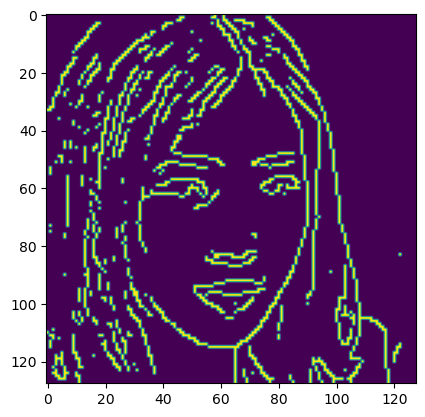

In [6]:

batch_edges = None

for image_batch in dataset.take(1):
    batch_edges = np.zeros_like(image_batch)
    batch_edges = batch_edges[:,:,:,0]
    batch_size = image_batch.shape[0]
    for i in range(batch_size):
        single_image = image_batch[i]    
        image_tensor = single_image.numpy()
        blurred_image = cv2.GaussianBlur(image_tensor, (3, 3), 0)
        edge_image = cv2.Canny(blurred_image, threshold1=140, threshold2=140)
        batch_edges[i] = edge_image
        pass
    pass

plt.imshow(batch_edges[0])
plt.show()

batch_edges = tf.expand_dims(batch_edges, axis = -1)
batch_edges = tf.tile(batch_edges, [1,1,1,3])

batch_edges =tf.convert_to_tensor(batch_edges)
batch_edges = tf.cast(batch_edges, tf.float32)
batch_edges = batch_edges/255.

    

In [7]:
test_image_path = "C:/Users/allan/Downloads/GANFacesDateset/seed5357.png"
image_file = tf.io.read_file(test_image_path)
image = tf.io.decode_png(image_file)
print(image.shape)

(1024, 1024, 3)
